# Churn Data

## Some basic exploratory data analysis

### Fields

- Customer ID: A unique identifier for each customer
- Surname: The customer's surname or last name
- Credit Score: A numerical value representing the customer's credit score
- Geography: The country where the customer resides (France, Spain or Germany)
- Gender: The customer's gender (Male or Female)
- Age: The customer's age.
- Tenure: The number of years the customer has been with the bank
- Balance: The customer's account balance
- NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
- HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
- IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
- EstimatedSalary: The estimated salary of the customer
- Exited: Whether the customer has churned (1 = yes, 0 = no)


## Summary

### Missing Values

No missing values

### Class Imabalance




In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
plt.style.use('seaborn-v0_8-pastel')

In [3]:
train_data = pd.read_csv("data/train.csv")

In [4]:
train_data

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [5]:
train_data.dtypes.sort_values()

id                   int64
CustomerId           int64
CreditScore          int64
Tenure               int64
NumOfProducts        int64
Exited               int64
Age                float64
Balance            float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Surname             object
Geography           object
Gender              object
dtype: object

## Class Imbalance

Positive class corresponds to approximately 21% of the data set

In [6]:
train_data['Exited'].value_counts(normalize=True)

Exited
0    0.788401
1    0.211599
Name: proportion, dtype: float64

In [7]:
train_data['Exited'].value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

## Missing Values

No missing values

In [8]:
train_data.isnull().sum() # no missing values

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Data Review

In [9]:
train_data['CustomerId'].unique().shape, train_data.shape

((23221,), (165034, 14))

In [10]:
# number of records per customer id
# most customer have 1-2 records, but some have many
train_data['CustomerId'].value_counts(sort=True, ascending=False).describe()

count    23221.000000
mean         7.107101
std          9.956665
min          1.000000
25%          1.000000
50%          2.000000
75%         10.000000
max        121.000000
Name: count, dtype: float64

In [11]:
train_data['CustomerId'].value_counts(sort=True, ascending=False).sample(n=5)

CustomerId
15777597     3
15695097    32
15803747     3
15594651     4
15641670     3
Name: count, dtype: int64

In [12]:
train_data.loc[train_data['CustomerId'] == 15713655]

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
13992,13992,15713655,Calabrese,720,France,Male,59.0,10,0.00,1,1.0,1.0,56229.72,1
74228,74228,15713655,Calabrese,720,France,Female,38.0,10,0.00,2,1.0,0.0,56229.72,0
89844,89844,15713655,Calabrese,720,France,Female,38.0,10,0.00,2,1.0,1.0,56229.72,0
117482,117482,15713655,Calabrese,720,France,Male,38.0,10,108028.08,2,1.0,1.0,56229.72,1
123589,123589,15713655,Calabrese,710,France,Female,38.0,2,0.00,3,1.0,1.0,56229.72,1
142542,142542,15713655,Calabrese,720,France,Male,38.0,4,0.00,2,1.0,1.0,56229.72,0


<Axes: >

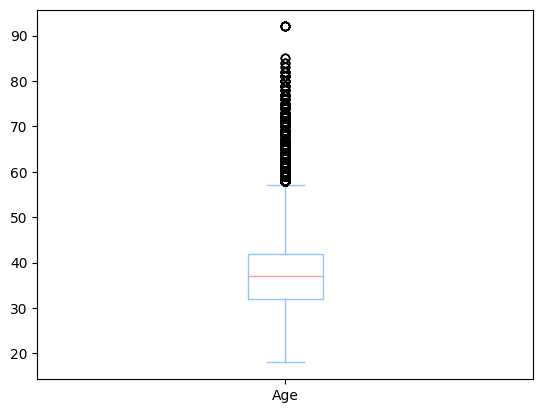

In [13]:
train_data['Age'].plot.box()

In [14]:
#train_data.plot.box(column = 'Age', by = 'Tenure')

Age    Axes(0.125,0.11;0.775x0.77)
dtype: object

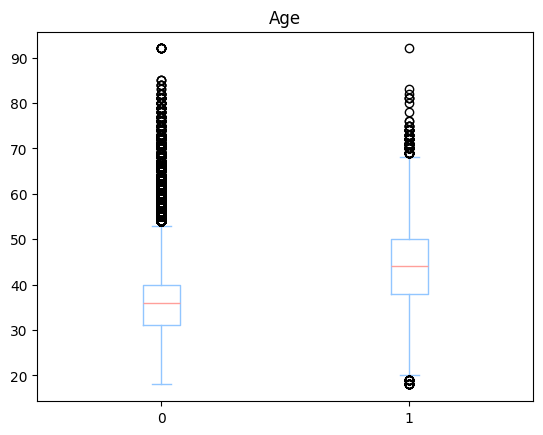

In [15]:
train_data.plot.box(column = 'Age', by = 'Exited')

In [16]:
#train_data.plot.box(column = 'CreditScore', by = 'Exited')

In [17]:
# Credit score  has no strong relationship with exited
train_data.groupby(by = 'Exited')['CreditScore'].median()

Exited
0    662.0
1    651.0
Name: CreditScore, dtype: float64

In [18]:
train_data.groupby(by = 'Exited')['Balance'].describe().T

Exited,0,1
count,130113.000000,34921.000000
mean,51255.807752,71209.978085
std,62189.978970,62646.691947
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,98955.870000
75%,116858.660000,125437.140000
max,250898.090000,238387.560000


In [19]:
train_data.groupby(by = 'Exited')['Balance'].apply(lambda balance: (balance > 0).mean())

Exited
0    0.422379
1    0.585006
Name: Balance, dtype: float64

<Axes: title={'center': 'Balance'}, xlabel='Exited'>

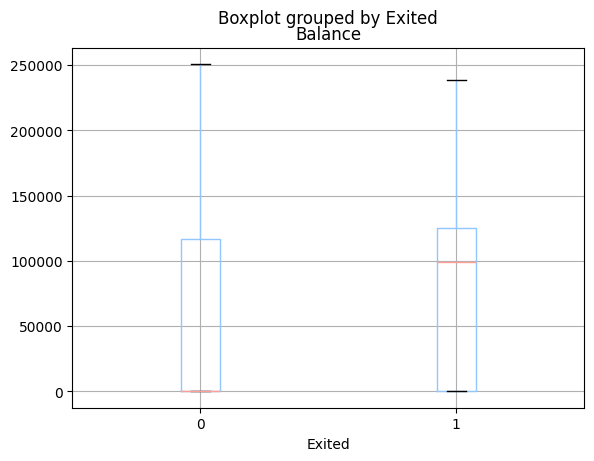

In [20]:
## Regarding Exited = 1, most accounts have values greater than $0.
## Accounts with Exited =0 have a lot of $0 balance.

train_data.boxplot(column='Balance', by = 'Exited') # the medians are different

<Axes: title={'center': 'EstimatedSalary'}, xlabel='Exited'>

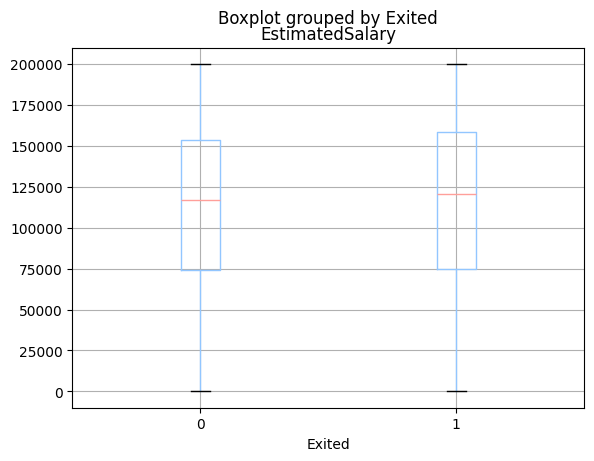

In [21]:
## Salary might not be predictive as there is no difference visually

train_data.boxplot(column='EstimatedSalary', by = 'Exited') # the medians are different

In [22]:
train_data.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [23]:
## Active members are more likely to remain
train_data.groupby(by = 'IsActiveMember')['Exited'].mean()

IsActiveMember
0.0    0.297086
1.0    0.125345
Name: Exited, dtype: float64

Text(0.5, 1.0, 'Active Members Are Less Likely to Exit')

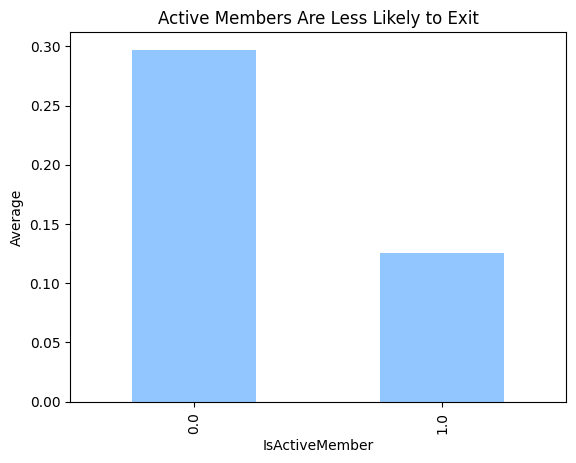

In [24]:
ax = train_data.groupby(by = 'IsActiveMember')['Exited'].mean().plot.bar()
ax.set_ylabel("Average")
ax.set_title("Active Members Are Less Likely to Exit")

In [25]:
train_data.groupby(by = 'Exited')['HasCrCard'].mean()

Exited
0    0.758894
1    0.735546
Name: HasCrCard, dtype: float64

In [26]:
## Relationship between HasCrCard and Exited seems to be weak

train_data.groupby(by = 'HasCrCard')['Exited'].mean()

HasCrCard
0.0    0.227429
1.0    0.206433
Name: Exited, dtype: float64

In [27]:
train_data.groupby(by = "Exited")['NumOfProducts'].mean()

Exited
0    1.615273
1    1.327854
Name: NumOfProducts, dtype: float64

Text(0.5, 1.0, "Users who Exited had more products.\n There aren't many non-exited who have 3-4 products")

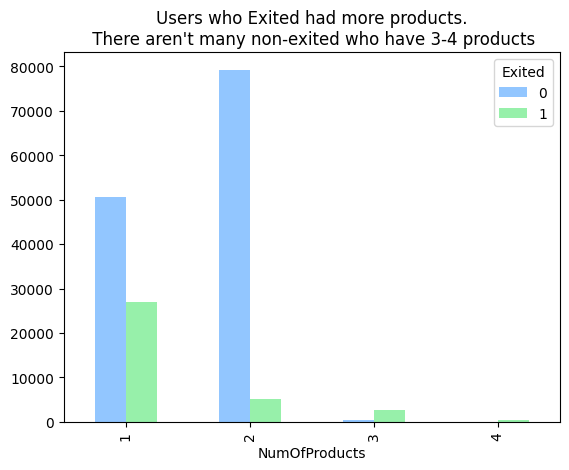

In [37]:
ax = train_data.pivot_table(index = 'Exited', columns='NumOfProducts', values='id', aggfunc='count').T.plot.bar()
ax.set_title("Users who Exited had more products.\n There aren't many non-exited who have 3-4 products")

In [29]:
pd.concat([train_data['Exited'].value_counts(), train_data['Exited'].value_counts(normalize=True)], axis=1)

,count,proportion
Exited,,
0,130113,0.788401
1,34921,0.211599


In [30]:
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
                      'IsActiveMember', 'EstimatedSalary', 'Exited']

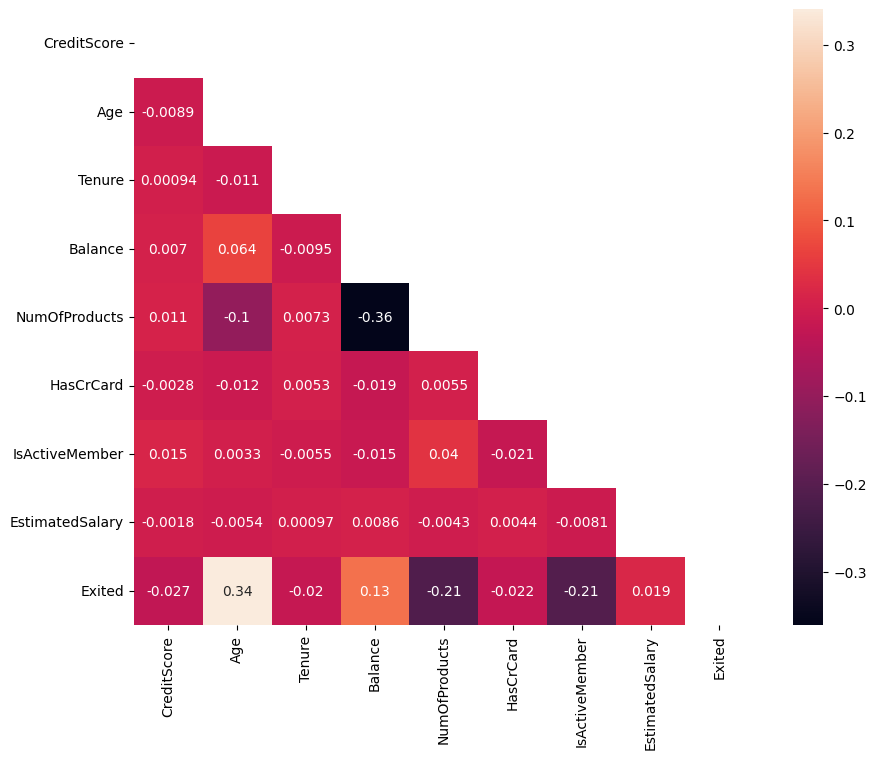

In [31]:
plt.figure(figsize=(10, 8))
corr_mat = train_data[numerical_features].corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool)) # lower triangle
sns.heatmap(corr_mat, annot=True, mask=mask)
plt.show()

In [32]:
train_data.groupby(by = 'Surname')['Exited'].mean().sort_values(ascending=False)

Surname
Lehr        1.0
Currey      1.0
Heap        1.0
Paten       1.0
Hebert      1.0
           ... 
Everett     0.0
Estes       0.0
Rioux       0.0
Esquivel    0.0
Abazu       0.0
Name: Exited, Length: 2797, dtype: float64

In [33]:
train_data.groupby(by = 'Surname')['Exited'].sum().loc['Currey']

1